In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '6'
import torch
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/mei/nas/docker/thesis/model_train')
from torch.utils.data import DataLoader
from torchsampler import ImbalancedDatasetSampler

from dataloader.pyg_reader import global_node2idx_mapping
from model.final_model.mortality.final_model_loss_train_mortality import *
from model.final_model.mortality.final_model_mortality import PatientOutcomeModel
from model.final_model.mortality.plot import *


import gc
gc.collect()
torch.cuda.empty_cache()
torch.cuda.synchronize()

In [2]:
from dataloader.graph_ts_reader_30 import  MultiModalDataset, collate_fn

# ===  get global node2index for graph data === 
hdf = '/home/mei/nas/docker/thesis/data/hdf/'
train_diagnoses = pd.read_hdf(f'{hdf}train/diagnoses.h5',key='df')
global_node2idx = global_node2idx_mapping(train_diagnoses)

# === load Dataset  ===
test_data_dir_30 = "/home/mei/nas/docker/thesis/data/hdf/test"
dataset_test_30 = MultiModalDataset(test_data_dir_30,global_node2idx)
test_loader_30 = DataLoader( dataset_test_30,batch_size=128,shuffle=False,collate_fn=collate_fn )


Built 461 patient-tree graphs


In [3]:
from dataloader.graph_ts_reader_60 import  MultiModalDataset, collate_fn

# ===  get global node2index for graph data === 
hdf = '/home/mei/nas/docker/thesis/data/hdf/'
train_diagnoses = pd.read_hdf(f'{hdf}train/diagnoses.h5',key='df')
global_node2idx = global_node2idx_mapping(train_diagnoses)

# === load Dataset  ===

test_data_dir_60 = "/home/mei/nas/docker/thesis/data/hdf/test"
dataset_test_60 = MultiModalDataset(test_data_dir_60,global_node2idx)
test_loader_60 = DataLoader( dataset_test_60,batch_size=128,shuffle=False,collate_fn=collate_fn )

Built 461 patient-tree graphs


# retnet 30 mortality

In [4]:
from model.retnet.autoencoder_v5_retnet import  TSAutoencoder


flat_input_dim = 104
hidden_dim = 128
graph_input_dim = 62

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === load pretrained model ===
pretrained_retnet_30 =  TSAutoencoder( input_channels=154, latent_dim=128, som_dim=(10,10), lstm_dim=200,  alpha_som_q=5).to(device)

pretrained_retnet_30.load_state_dict(torch.load(
"/home/mei/nas/docker/thesis/data/model_results/retnet/resampled_30/stage6_higher_kappa/best_joint.pth", map_location=device,weights_only=True ))
pretrained_encoder_retnet_30 = pretrained_retnet_30.encoder
som_retnet_30 = pretrained_retnet_30.som_layer


# === load retnet final model ===
model_retnet_30 = PatientOutcomeModel(flat_input_dim,graph_input_dim, hidden_dim,som=som_retnet_30,pretrained_encoder=pretrained_encoder_retnet_30).to(device) 
best_model_30 = '/home/mei/nas/docker/thesis/data/model_results/final_model_retnet/mortality/resampled_30/best_joint.pth'
model_retnet_30 .load_state_dict(torch.load(best_model_30,weights_only=True))

<All keys matched successfully>

# retnet 60 mortality

In [5]:
pretrained_retnet_60 =  TSAutoencoder( input_channels=154, latent_dim=128, som_dim=(10,10), lstm_dim=200,  alpha_som_q=5).to(device)

pretrained_retnet_60.load_state_dict(torch.load(
"/home/mei/nas/docker/thesis/data/model_results/retnet/resampled_60/stage6_higher_kappa/best_joint.pth", map_location=device,weights_only=True ))
pretrained_encoder_retnet_60 = pretrained_retnet_60.encoder
som_retnet_60 = pretrained_retnet_60.som_layer

# === load retnet final model ===
model_retnet_60 = PatientOutcomeModel(flat_input_dim,graph_input_dim, hidden_dim,som=som_retnet_60,pretrained_encoder=pretrained_encoder_retnet_60).to(device) 
best_model_60 = '/home/mei/nas/docker/thesis/data/model_results/final_model_retnet/mortality/resampled_60/best_joint.pth'
model_retnet_60.load_state_dict(torch.load(best_model_60,weights_only=True))

<All keys matched successfully>

# lstm 30 

In [6]:
# ===load lstm final model==
from model.lstm.autoencoder_v3_lstm import  TSAutoencoder
pretrained_lstm_30 =  TSAutoencoder( input_channels=154, latent_dim=128, som_dim=(10,10), lstm_dim=200,  alpha_som_q=5).to(device)

pretrained_lstm_30.load_state_dict(torch.load(
"/home/mei/nas/docker/thesis/data/model_results/baseline/resampled_30/stage3/best_joint.pth", map_location=device,weights_only=True ))

pretrained_encoder_lstm_30 = pretrained_lstm_30.encoder
som_lstm_30 = pretrained_lstm_30.som_layer

# === load final model ===
model_lstm_30 = PatientOutcomeModel(flat_input_dim,graph_input_dim, hidden_dim,som=som_lstm_30,pretrained_encoder=pretrained_encoder_lstm_30).to(device)
best_model_lstm_30 = '/home/mei/nas/docker/thesis/data/model_results/final_model_lstm/mortality/resampled_30/best_joint.pth'
model_lstm_30.load_state_dict(torch.load(best_model_lstm_30,weights_only=True))

<All keys matched successfully>

In [8]:
pretrained_lstm_60 =  TSAutoencoder( input_channels=154, latent_dim=128, som_dim=(10,10), lstm_dim=200,  alpha_som_q=5).to(device)

pretrained_lstm_60.load_state_dict(torch.load(
"/home/mei/nas/docker/thesis/data/model_results/baseline/resampled_60/stage3/best_joint.pth", map_location=device,weights_only=True ))

pretrained_encoder_lstm_60 = pretrained_lstm_60.encoder
som_lstm_60 = pretrained_lstm_60.som_layer

# === load final model ===
model_lstm_60 = PatientOutcomeModel(flat_input_dim,graph_input_dim, hidden_dim,som=som_lstm_60,pretrained_encoder=pretrained_encoder_lstm_60).to(device)
best_model_lstm_60='/home/mei/nas/docker/thesis/data/model_results/final_model_lstm/mortality/resampled_60_/best_joint.pth'
model_lstm_60.load_state_dict(torch.load(best_model_lstm_60,weights_only=True))

<All keys matched successfully>

In [9]:
def get_predictions(model, dataloader, device):
    """
    对单个模型在 dataloader 上 test, 返回真实标签和预测概率（只取最后一步的预测）
    """
    model.eval()
    all_preds = []
    all_trues = []
    with torch.no_grad():
        for _, flat, ts, graph, _, lengths, _, mortality, _ in dataloader:
            
            flat, ts, lengths = flat.to(device), ts.to(device), lengths.to(device)
            graph = graph.to(device)

            out = model(flat, graph, ts, lengths)
            
            idx = torch.arange(flat.size(0), device=device)
            last = (lengths - 1).clamp(min=0)
            preds = out["mortality_prob"][idx, last].cpu().numpy()
            trues = mortality.numpy()

            all_preds.append(preds)
            all_trues.append(trues)

    y_pred = np.concatenate(all_preds, axis=0)
    y_true = np.concatenate(all_trues, axis=0)
    return y_true, y_pred

In [ ]:
models = {
    "RetNet_30min": model_retnet_30,   
    "LSTM_30min":   model_lstm_30,
}

for name, mdl in models.items():
    y_true, y_pred = get_predictions(mdl, test_loader_30, device)
    np.savez(f"//home/mei/nas/docker/thesis/data/model_results/final_model_retnet/risk/compare_rocprc/{name}_preds.npz",
             y_true=y_true, y_pred=y_pred)
    print(f"[Saved] {name} → /home/mei/results/{name}_preds.npz")

In [11]:
# find the largest time step in the dataset
def get_max_length(dataloader):
    max_length = 0
    for _, _, _, _, _, lengths, _, _, _ in dataloader:
        max_length = max(max_length, lengths.max().item())
    print(f"Max length in the dataset: {max_length}")
    return max_length

In [12]:
get_max_length(test_loader_30)
get_max_length(test_loader_60)

Max length in the dataset: 530
Max length in the dataset: 266


266

In [ ]:
models = {
    "RetNet_60min": model_retnet_60,  
    "LSTM_60min":   model_lstm_60,
}

for name, mdl in models.items():
    y_true, y_pred = get_predictions(mdl, test_loader_60, device)
    np.savez(f"//home/mei/nas/docker/thesis/data/model_results/final_model_retnet/risk/compare_rocprc/{name}_preds.npz",
             y_true=y_true, y_pred=y_pred)
    print(f"[Saved] {name} → /home/mei/results/{name}_preds.npz")

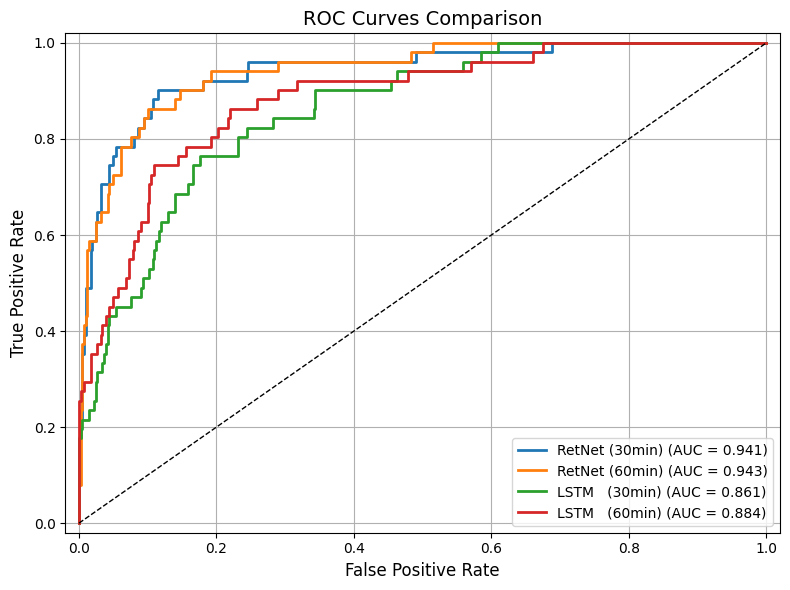

In [14]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

results = {
    "RetNet (30min)": "/home/mei/nas/docker/thesis/data/model_results/final_model_retnet/risk/compare_rocprc/RetNet_30min_preds.npz",
    "RetNet (60min)": "/home/mei/nas/docker/thesis/data/model_results/final_model_retnet/risk/compare_rocprc/RetNet_60min_preds.npz",
    "LSTM   (30min)": "/home/mei/nas/docker/thesis/data/model_results/final_model_retnet/risk/compare_rocprc/LSTM_30min_preds.npz",
    "LSTM   (60min)": "/home/mei/nas/docker/thesis/data/model_results/final_model_retnet/risk/compare_rocprc/LSTM_60min_preds.npz",
}


plt.figure(figsize=(8, 6))
for label, path in results.items():
    data = np.load(path)
    y_true, y_pred = data["y_true"], data["y_pred"]
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2,
             label=f"{label} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curves Comparison", fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


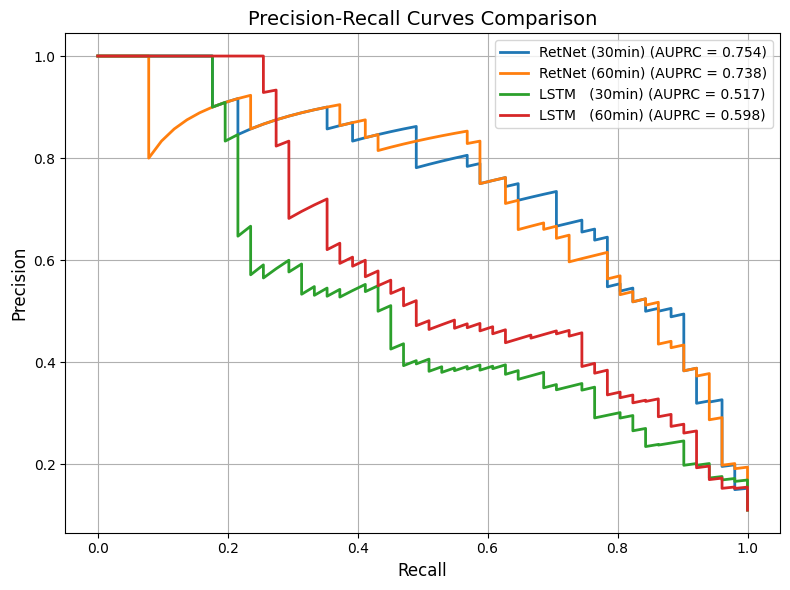

In [15]:
plt.figure(figsize=(8, 6))
for label, path in results.items():
    data = np.load(path)
    y_true, y_pred = data["y_true"], data["y_pred"]
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    prc_auc = auc(recall, precision)
    plt.plot(recall, precision, lw=2,
             label=f"{label} (AUPRC = {prc_auc:.3f})")

plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision-Recall Curves Comparison", fontsize=14)
plt.legend(loc="upper right", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
from torch_geometric.data import Batch

def plot_multi_model_patient_mortality(
    models: dict,
    dataset,
    patient_index: int,
    device: torch.device
):
    
    if isinstance(dataset, torch.utils.data.DataLoader):
        dataset = dataset.dataset

    pid, flat, ts, graph, risk, cat, mort, _ = dataset[patient_index]
    T = ts.size(0)

    flat_b = flat.unsqueeze(0).to(device)     # [1, D_flat]
    ts_b   = ts.unsqueeze(0).to(device)       # [1, T, D_ts]
    graph_b= Batch.from_data_list([graph]).to(device)
    lengths= torch.tensor([T], device=device)

    # true mortality value
    true_line = np.full(T, float(mort.item()))

    plt.figure(figsize=(10, 4))
    plt.plot(true_line, '--', color='red', alpha=0.7, label=f"True ({'Death' if mort else 'Alive'})")

    # 针对每个模型，计算并画出预测轨迹
    for name, model in models.items():
        model.eval()
        with torch.no_grad():
            out = model(flat_b, graph_b, ts_b, lengths)
            # out["mortality_prob"] 形状 [1, T]
            pred = out["mortality_prob"][0, :T].cpu().numpy()
        plt.plot(pred, 
                 label=f"{name}", 
                 linewidth=1,
                 linestyle='-')

    plt.title(f"Patient {pid} Mortality Probability Trajectory")
    plt.xlabel("Time Step")
    plt.ylabel("Mortality Probability")
    plt.ylim(0, 1.05)
    plt.grid(True)
    plt.legend(loc="upper right", fontsize=9)
    plt.tight_layout()
    plt.show()

241 --- torch.Size([2, 10])
99 --- torch.Size([2, 10])
5 torch.Size([2, 10])
EDGE_INDEX: torch.Size([2, 10])		LOOP_INDEX: torch.Size([2, 5])
241 --- torch.Size([2, 10])
99 --- torch.Size([2, 10])
5 torch.Size([2, 10])
EDGE_INDEX: torch.Size([2, 10])		LOOP_INDEX: torch.Size([2, 5])
241 --- torch.Size([2, 10])
99 --- torch.Size([2, 10])
5 torch.Size([2, 10])
EDGE_INDEX: torch.Size([2, 10])		LOOP_INDEX: torch.Size([2, 5])
241 --- torch.Size([2, 10])
99 --- torch.Size([2, 10])
5 torch.Size([2, 10])
EDGE_INDEX: torch.Size([2, 10])		LOOP_INDEX: torch.Size([2, 5])


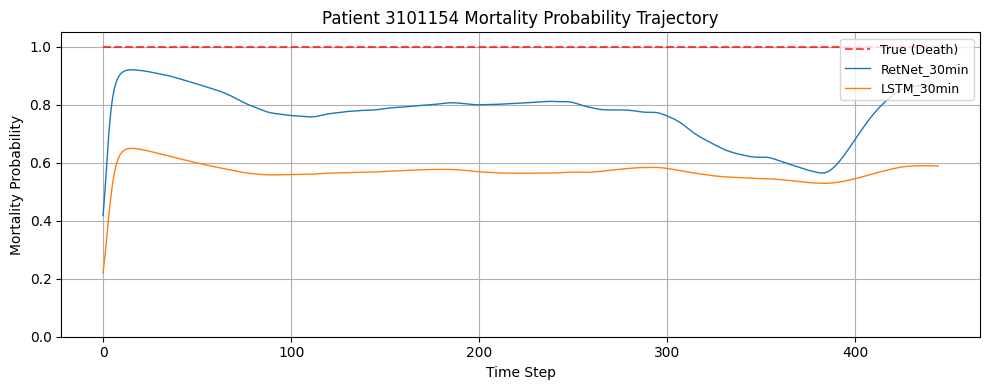

In [17]:
from collections import OrderedDict

models = OrderedDict([
    ("RetNet_30min", model_retnet_30),
    ("LSTM_30min",   model_lstm_30)
])

plot_multi_model_patient_mortality(
    models=models,
    dataset=test_loader_30,     
    patient_index=317,
    device=device
)

241 --- torch.Size([2, 12])
99 --- torch.Size([2, 12])
4 torch.Size([2, 12])
EDGE_INDEX: torch.Size([2, 12])		LOOP_INDEX: torch.Size([2, 4])
241 --- torch.Size([2, 12])
99 --- torch.Size([2, 12])
4 torch.Size([2, 12])
EDGE_INDEX: torch.Size([2, 12])		LOOP_INDEX: torch.Size([2, 4])
241 --- torch.Size([2, 12])
99 --- torch.Size([2, 12])
4 torch.Size([2, 12])
EDGE_INDEX: torch.Size([2, 12])		LOOP_INDEX: torch.Size([2, 4])
241 --- torch.Size([2, 12])
99 --- torch.Size([2, 12])
4 torch.Size([2, 12])
EDGE_INDEX: torch.Size([2, 12])		LOOP_INDEX: torch.Size([2, 4])


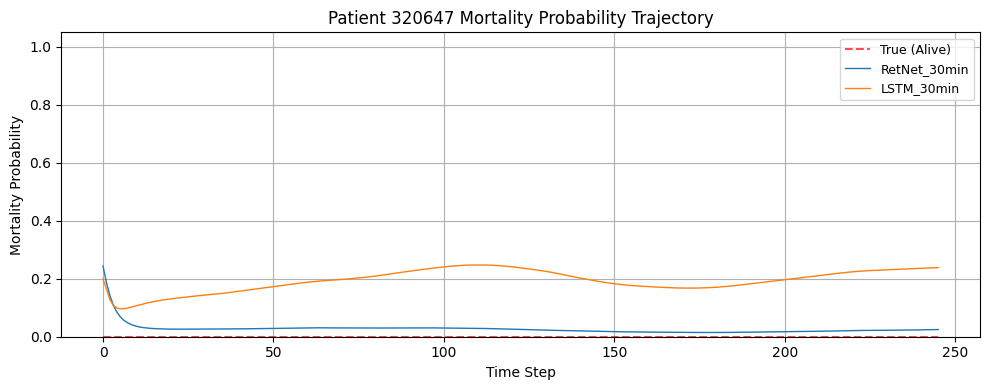

In [18]:
plot_multi_model_patient_mortality(
    models=models,
    dataset=test_loader_30,     
    patient_index=398,
    device=device
)

# resampled in 60

241 --- torch.Size([2, 10])
99 --- torch.Size([2, 10])
5 torch.Size([2, 10])
EDGE_INDEX: torch.Size([2, 10])		LOOP_INDEX: torch.Size([2, 5])
241 --- torch.Size([2, 10])
99 --- torch.Size([2, 10])
5 torch.Size([2, 10])
EDGE_INDEX: torch.Size([2, 10])		LOOP_INDEX: torch.Size([2, 5])
241 --- torch.Size([2, 10])
99 --- torch.Size([2, 10])
5 torch.Size([2, 10])
EDGE_INDEX: torch.Size([2, 10])		LOOP_INDEX: torch.Size([2, 5])
241 --- torch.Size([2, 10])
99 --- torch.Size([2, 10])
5 torch.Size([2, 10])
EDGE_INDEX: torch.Size([2, 10])		LOOP_INDEX: torch.Size([2, 5])


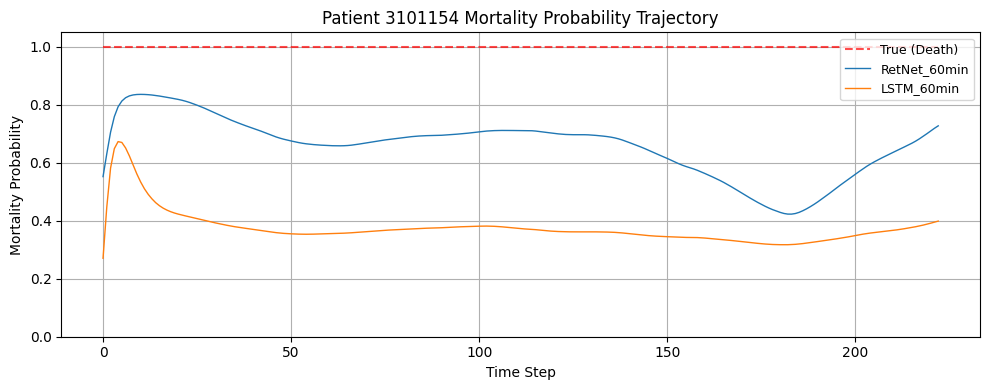

In [19]:
models = OrderedDict([
    ("RetNet_60min", model_retnet_60),
    ("LSTM_60min",   model_lstm_60)
])

plot_multi_model_patient_mortality(
    models=models,
    dataset=test_loader_60,     
    patient_index=317,
    device=device
)

241 --- torch.Size([2, 12])
99 --- torch.Size([2, 12])
4 torch.Size([2, 12])
EDGE_INDEX: torch.Size([2, 12])		LOOP_INDEX: torch.Size([2, 4])
241 --- torch.Size([2, 12])
99 --- torch.Size([2, 12])
4 torch.Size([2, 12])
EDGE_INDEX: torch.Size([2, 12])		LOOP_INDEX: torch.Size([2, 4])
241 --- torch.Size([2, 12])
99 --- torch.Size([2, 12])
4 torch.Size([2, 12])
EDGE_INDEX: torch.Size([2, 12])		LOOP_INDEX: torch.Size([2, 4])
241 --- torch.Size([2, 12])
99 --- torch.Size([2, 12])
4 torch.Size([2, 12])
EDGE_INDEX: torch.Size([2, 12])		LOOP_INDEX: torch.Size([2, 4])


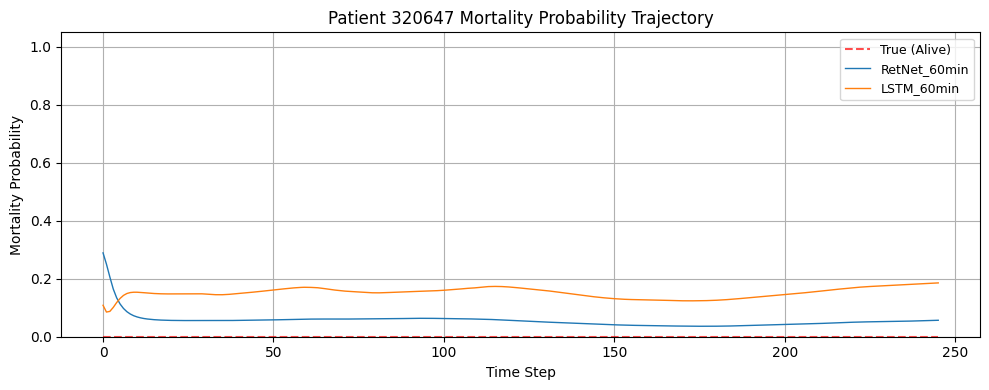

In [20]:
plot_multi_model_patient_mortality(
    models=models,
    dataset=test_loader_30,     
    patient_index=398,
    device=device
)